# Potencial y Campo eléctrico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.draw import disk, circle_perimeter

from datetime import datetime

## Potencial de cargas puntuales

In [50]:
np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} V" if plt.rcParams["text.usetex"] else f"{s} V"

def P_puntuales(cargas, dim, levels = 5, roi=(0,0,0), figsize=(6,6), titulo='Título',
                EF = False, density=1):
    x = np.arange(-dim, dim+1)
    y = np.arange(-dim, dim+1)
    X, Y = np.meshgrid(x, y)
    V = x*y
    V = V*0
    for carga in cargas:
        xq, yq, q = carga
        D = np.sqrt(np.power(X - xq, 2) + 
                    np.power(Y - yq, 2))
        V = V + 9E9 * 1000 * q / D

    fig, ax = plt.subplots(1, 1, figsize=figsize,facecolor=(1, 1, 1) )
    CS2 = ax.contour(X, Y, V, levels=levels)
    ax.clabel(CS2, inline=True, fmt=fmt, fontsize=10)
    ax.set_title(titulo)
    for carga in cargas:
        xq, yq, q = carga
        circ = plt.Circle((xq,yq), 0.02*dim)
        ax.add_patch(circ)
    if roi[2]>0:
        plt.xlim((roi[0], roi[0]+roi[2]))
        plt.ylim((roi[1], roi[1]+roi[2]))
    
    if EF:
        E = np.gradient(-1*V)
        ax.streamplot(X, Y, E[1], E[0], linewidth=1, cmap=plt.cm.inferno,
              density=density, arrowstyle='->', arrowsize=1.5)
    plt.xlabel('x [mm]')
    plt.ylabel('y [mm]')
    plt.grid()
    plt.show()
        
    return V

            

### Una carga puntual

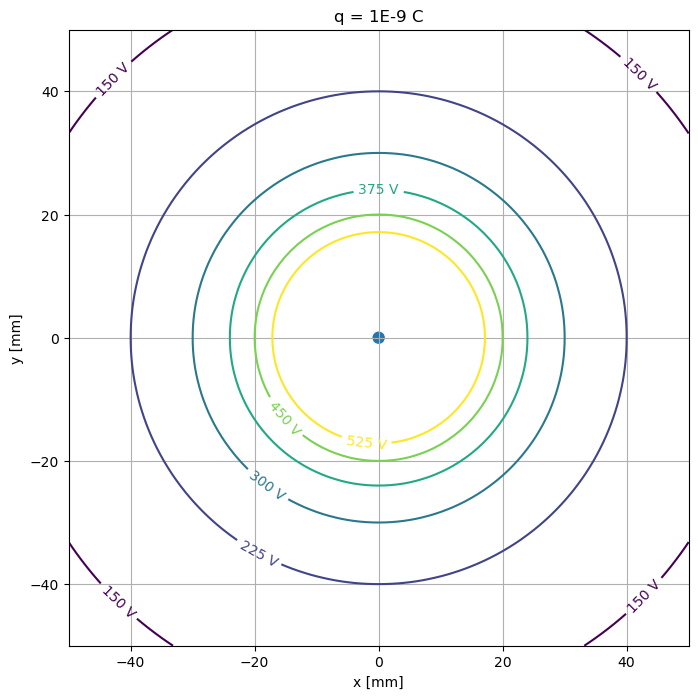

In [55]:
cargas = [
    [0, 0, 1E-9],
]
levels = np.arange(150,600,75)
# levels = [150, 200, ,600]
# levels = 20
titulo = "q = 1E-9 C"
figsize = (8,8)
EF = False
density = 0.5
P = P_puntuales(cargas, 50, levels=levels, figsize=figsize, titulo=titulo, EF=EF, density=density)


### Dos cargas

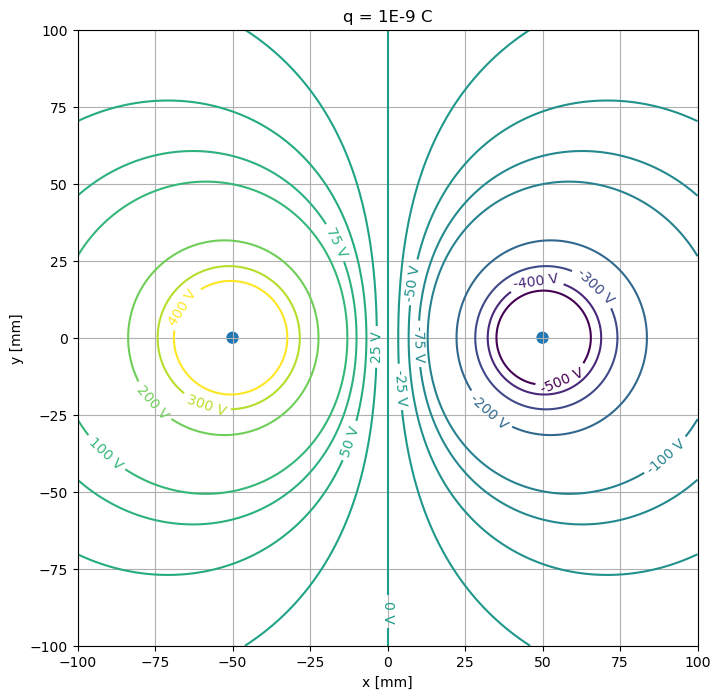

In [59]:
cargas = [
    [-50, 0, 1E-9],
    [50, 0, -1E-9],
]
levels = np.arange(-500,-100,100)
levels = np.concatenate([levels, np.arange(-100,100,25)])
levels = np.concatenate([levels, np.arange(100,500,100)])
# levels = [150, 200, ,600]
# levels = 1
titulo = "q = 1E-9 C"
figsize = (8,8)
EF = False
density = 0.5
P = P_puntuales(cargas, 100, levels=levels, figsize=figsize, titulo=titulo, EF=EF, density=density)

### Ejercicio 14.6

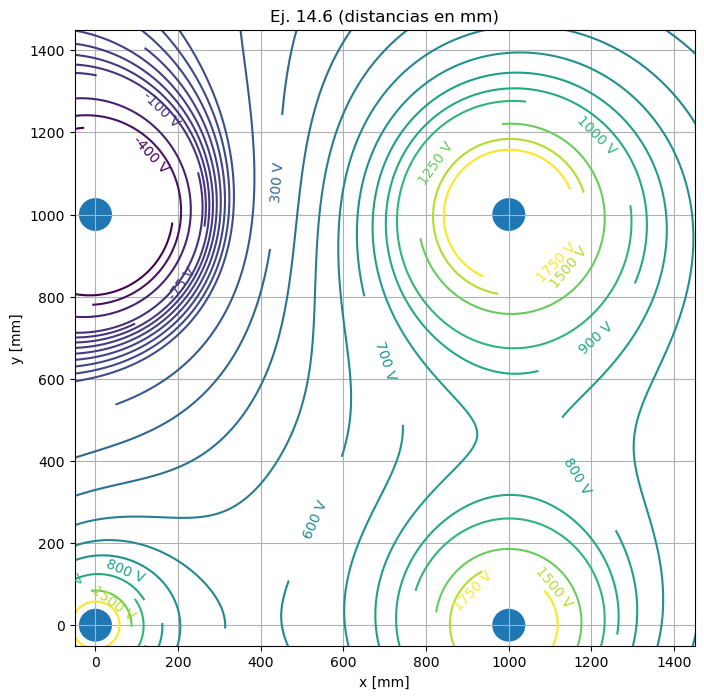

In [64]:
cargas = [
    [0, 0, 10E-9],
    [0, 1000, -20E-9],
    [1000, 1000, 30E-9],
    [1000, 0, 20E-9],
]
levels = np.arange(-400,-100,100)
levels = np.concatenate([levels, np.arange(-100,100,25)])
levels = np.concatenate([levels, np.arange(100,1000,100)])
levels = np.concatenate([levels, np.arange(1000,2000,250)])
# levels = [150, 200, ,600]
# levels = 1
roi = (-50,-50, 1500)
titulo = "Ej. 14.6 (distancias en mm)"
figsize = (8,8)
EF = False
density = 1
P = P_puntuales(cargas, 2000, levels=levels, roi=roi, figsize=figsize, titulo=titulo, EF=EF, density=density)


## Cuadrado cerrado

In [ ]:
Vc = 0
N = 100
Vc = np.ndarray(shape=(N,N), dtype=float)

In [ ]:
Vc0 = 0
Vc1 = 12
Vc2 = 0
Vc[0,:] = np.ones(N)*Vc1
Vc[-1,:] = np.ones(N)*Vc2
Vc[:,0] = np.ones(N)*Vc0
Vc[:,-1] = np.ones(N)*Vc0
# Vc[0,:] = np.zeros(N)
# Vc[-1,:] = np.zeros(N)
# Vc[:,0] = np.zeros(N)
# Vc[:,-1] = np.zeros(N)
# Vold = Vc.copy()  #Future criteria for stopping

In [ ]:
for i in range(10000):
    V1 = np.roll(Vc,-1,axis=0)
    V2 = np.roll(Vc,1,axis=0)
    V3 = np.roll(Vc,-1,axis=1)
    V4 = np.roll(Vc,1,axis=1)
    Vc = (V1+V2+V3+V4)/4
    Vc[0,:] = np.ones(N)*Vc1
    Vc[-1,:] = np.ones(N)*Vc2
    Vc[:,0] = np.ones(N)*Vc0
    Vc[:,-1] = np.ones(N)*Vc0
    # print(np.mean((V-Vold)**2)) #Future stopping criteria
    # Vold=Vc.copy()

In [ ]:
x = np.arange(0,100)
y = np.arange(0,100)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 2, figsize=(16,8),facecolor=(1, 1, 1) )
ax[0].imshow(Vc)
CSc = ax[1].contour(X, Y, Vc)
ax[1].clabel(CSc, inline=True, fontsize=10)
ax[1].set_title('Simplest default with labels')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10),facecolor=(1, 1, 1) )
CSc = ax.contour(X, Y, Vc)
ax.clabel(CSc, inline=True, fontsize=10)
# ax.set_title('Simplest default with labels')

## Región abierta

In [2]:
N = 500
V = np.ndarray(shape=(N,N), dtype=float)

In [3]:
ys1 = 220
ys2 = 300
xs1 = 180
xs2 = 200
Vs = -12
V[ys1:ys2,xs1:xs2] = Vs
#Circle: 
xc = 300
yc = 220
Vc = 12
rr1,cc1 = disk((yc,xc),20)
V[rr1,cc1] = Vc
Vold = V.copy()
rr,cc = disk((250,250),249)
V[:,:] = 0
V[rr,cc] = Vold[rr,cc]
for i in range(10000):
    V1 = np.roll(V,-1,axis=0)
    V2 = np.roll(V,1,axis=0)
    V3 = np.roll(V,-1,axis=1)
    V4 = np.roll(V,1,axis=1)
    V = (V1+V2+V3+V4)/4
    V[ys1:ys2,xs1:xs2]= Vs
    V[rr1,cc1] = Vc
    Vold = V.copy()
    V[:,:] = 0
    V[rr,cc] = Vold[rr,cc]
    print('Iteration '+str(i).zfill(6), end="\r")
    # print(np.mean((V-Vold)**2))


In [4]:
# ROI
x1 = 250
x2 = 300
y1 = 250
y2 = 300
Vclip = V[y1:y2,x1:x2]

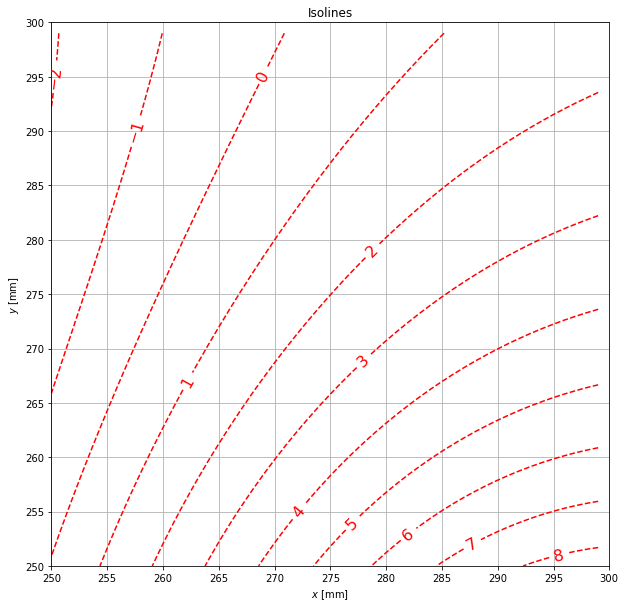

In [5]:
levels = range(-11,12)
x = np.arange(x1,x2)
y = np.arange(y1,y2)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(10,10),facecolor=(1, 1, 1) )
CS = ax.contour(X, Y, Vclip, levels, colors='red', linestyles='dashed')
#se puede usar cmap en lugar de colors, por defecto es cmap
ax.clabel(CS, inline=True, fontsize=16)
ax.set_title('Isolines')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.xticks(np.arange(x1, x2+1, 5)) 
plt.yticks(np.arange(y1, y2+1, 5))
plt.grid()
# plt.savefig("cuba_02.jpg", dpi='figure')
# ax.set_title('Simplest default with labels')

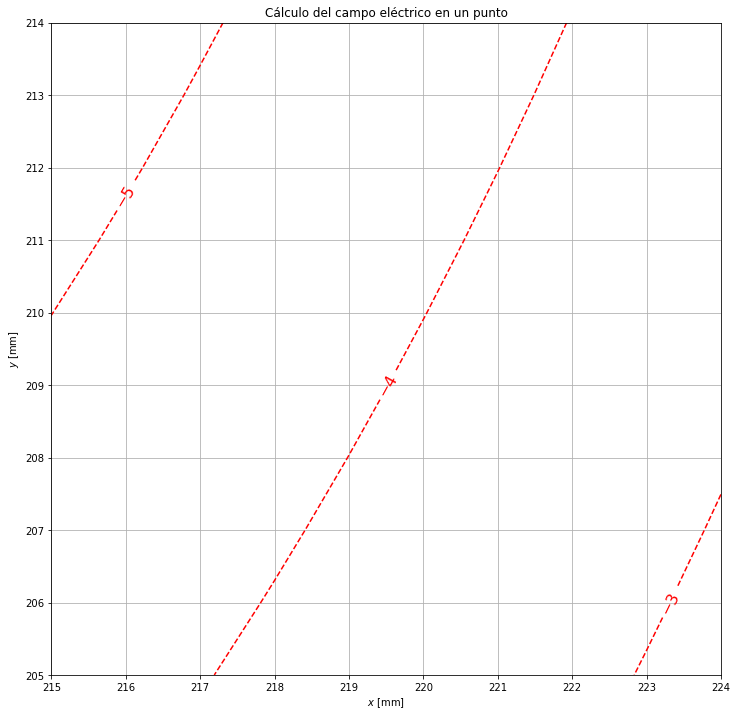

In [6]:
# ROI
x1 = 215
x2 = 225
y1 = 205
y2 = 215
Vclip2 = V[y1:y2,x1:x2]
levels = range(-11,12)
x = np.arange(x1,x2)
y = np.arange(y1,y2)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(12,12),facecolor=(1, 1, 1) )
CS = ax.contour(X, Y, Vclip2, levels, colors='red', linestyles='dashed')
# CS = ax.contour(X, Y, V, levels, colors='red', linestyles='dashed')
#se puede usar cmap en lugar de colors, por defecto es cmap
ax.clabel(CS, inline=True, fontsize=16)
#Title for lab instructions
ax.set_title('Cálculo del campo eléctrico en un punto')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.xticks(np.arange(x1, x2, 1)) 
plt.yticks(np.arange(y1, y2, 1))
plt.grid()
# plt.savefig("cuba_03.jpg", dpi='figure')
# tikzplotlib.save("cuba_03.tex")

In [11]:
#Revisando coordenadas:
xo = 220
yo = 210
print("Sobre la equipotencial de 1 V, y sobre el eje y de la figura: ",V[yo,xo])
xo = 225
yo = 210
print("Desplazado 5 cm hacia la derecha: ", V[yo,xo])

Sobre la equipotencial de 1 V, y sobre el eje y de la figura:  -4.009645100200324
Desplazado 5 cm hacia la derecha:  -3.0150808546954733


Text(0.5, 1.0, 'Isolines')

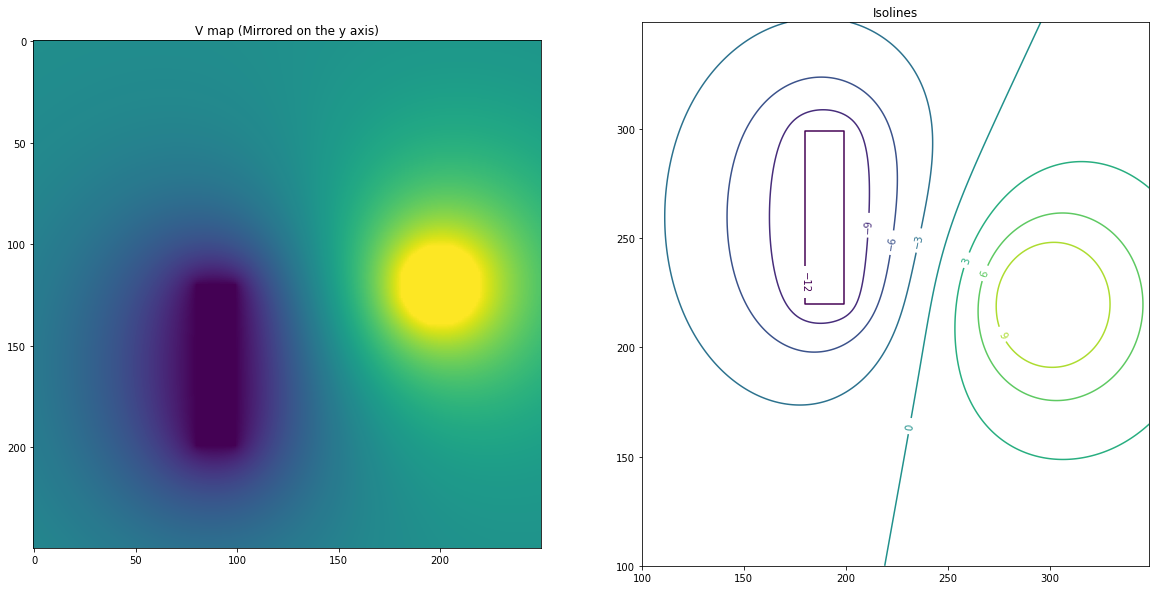

In [12]:
# ROI
x1 = 100
x2 = 350
y1 = 100
y2 = 350
x = np.arange(x1,x2)
y = np.arange(y1,y2)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 2, figsize=(20,10),facecolor=(1, 1, 1) )
ax[0].imshow(V[y1:y2,x1:x2])
ax[0].set_title('V map (Mirrored on the y axis)')
CS2 = ax[1].contour(X, Y, V[y1:y2,x1:x2])
ax[1].clabel(CS2, inline=True, fontsize=10)
ax[1].set_title('Isolines')

## Find the electric field

Cuidado con las coordenadas, x e y están invertidas respecto de los índices de numpy.

In [7]:
Ef = np.gradient(-1*V)

In [8]:
Ef[0].shape

(500, 500)

In [ ]:
#Finding E at some position.
#Extracted from E array and also approximated as incremental quotient.
xo = 220
yo = 210
print("Ex = ", Ef[1][yo,xo]," ; Ey = ", Ef[0][yo,xo])
print("Ex aprox = ",-1*(V[yo,xo+1]-V[yo,xo-1])/2)
print("Ey aprox = ",-1*(V[yo+1,xo]-V[yo-1,xo])/2)

In [ ]:
# levels = range(-11,12)
# ROI
x1 = 240
x2 = 290
y1 = 255
y2 = 305
x = np.arange(x1,x2)
y = np.arange(y1,y2)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(12,12),facecolor=(1, 1, 1) )
ax.streamplot(X, Y, Ef[1][y1:y2,x1:x2], Ef[0][y1:y2,x1:x2], linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
ax.set_title('Líneas de campo eléctrico en una región pequeña')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
# plt.xticks(np.arange(0, 51, 5)) 
# plt.yticks(np.arange(0, 51, 5))
plt.grid()

In [ ]:
# levels = range(-11,12)
# ROI
x1 = 0
x2 = 500
y1 = 0
y2 = 500
x = np.arange(x1,x2)
y = np.arange(y1,y2)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(12,12),facecolor=(1, 1, 1) )
ax.streamplot(X, Y, Ef[1], Ef[0], linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
ax.set_title('Líneas de campo eléctrico')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
# plt.xticks(np.arange(0, 51, 5)) 
# plt.yticks(np.arange(0, 51, 5))
plt.grid()

## Locate positions for specific values of V

In [ ]:
Vm = V.copy()
Vm[Vm>4.01] = 0
Vm[Vm<3.99] = 0

In [ ]:
# x,y = np.where(Vm>0)
# np.where(Vm>0)

In [ ]:
# punto A de la practica de laboratorio
# Valores usados en la guía del laboratorio
# Las coordenadas en V (numpy) están invertidas
# Coordenadas en el gráfico de contorno:
xa = 220
ya = 210
V[ya,xa]

In [ ]:
Va = V[ya,xa]
V1 = V[ya, xa-4]
V2 = V[ya, xa-2]
V3 = V[ya, xa+2]
V4 = V[ya, xa+4]
V5 = V[ya-4, xa]
V6 = V[ya-2, xa]
V7 = V[ya+2, xa]
V8 = V[ya+4, xa]
print("V's en el eje x: ",V1,V2,Va,V3,V4)
print("V's en el eje y: ",V5,V6,Va,V7,V8)
E12 = (V1-V2)/2
E2a = (V2-Va)/2
Ea3 = (Va-V3)/2
E34 = (V3-V4)/2
E56 = (V5-V6)/2
E6a = (V6-Va)/2
Ea7 = (Va-V7)/2
E78 = (V7-V8)/2
print("Ex medios: ",E12,E2a,Ea3,E34)
print("Ey medios: ",E56, E6a, Ea7, E78)

In [ ]:
print("Promedio de los 4 Ex: ", (E12+E2a+Ea3+E34)/4)
print("Promedio de los 2 Ex del medio: ",(E2a+Ea3)/2)
print("Valor medio usando 4 mm de desplazamiento: ",(V2-V3)/4)

In [ ]:
print("Promedio de los 4 Ey: ", (E56+E6a+Ea7+E78)/4)
print("Promedio de los 2 Ey del medio: ",(E6a+Ea7)/2)
print("Valor medio usando 4 mm de desplazamiento: ",(V6-V7)/4)

## Generate figures for quiz

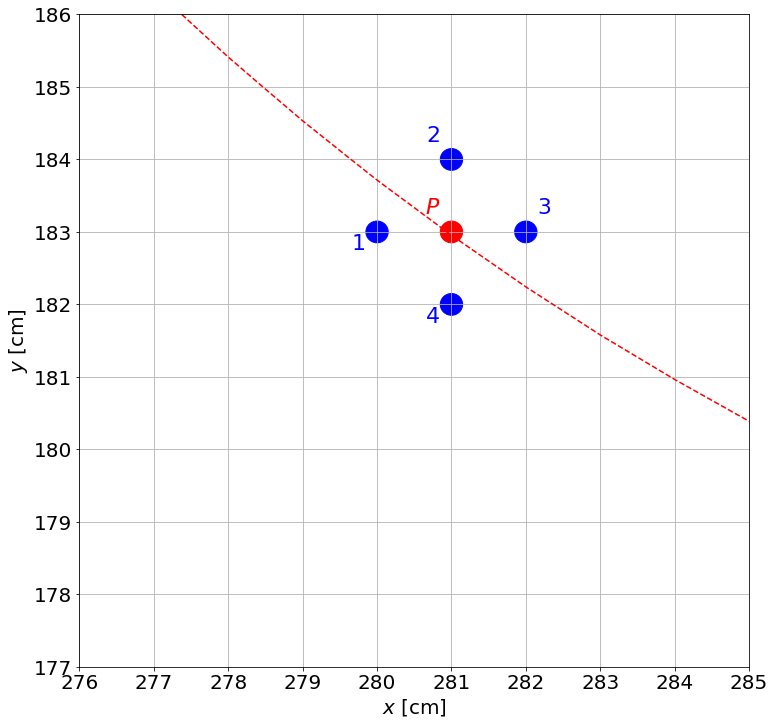

In [22]:
# ROI
xa = 281
ya = 183
d = 1
x1 = 276
x2 = 286
y1 = 177
y2 = 187
Vclip2 = V[y1:y2,x1:x2]
# levels = range(5,7)
levels = [6]
x = np.arange(x1,x2)
y = np.arange(y1,y2)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(12,12),facecolor=(1, 1, 1) )
CS = ax.contour(X, Y, Vclip2, levels, colors='red', linestyles='dashed')
# CS = ax.contour(X, Y, V, levels, colors='red', linestyles='dashed')
#se puede usar cmap en lugar de colors, por defecto es cmap
# ax.clabel(CS, inline=True, fontsize=16)
# ax.set_title('Cálculo del campo eléctrico en un punto')
c = plt.Circle((xa, ya), 0.15, color='red', linewidth=1, fill=True)
ax.text(xa - 0.25, ya + 0.25, "$P$", ha="center", family='sans-serif', size=22, color='red')
ax.add_patch(c)
c = plt.Circle((xa - d, ya), 0.15, color='blue', linewidth=1, fill=True)
ax.text(xa - d - 0.25, ya - 0.25, "$1$", ha="center", family='sans-serif', size=22, color='blue')
ax.add_patch(c)
c = plt.Circle((xa, ya+d), 0.15, color='blue', linewidth=1, fill=True)
ax.text(xa - 0.25, ya+d + 0.25, "$2$", ha="center", family='sans-serif', size=22, color='blue')
ax.add_patch(c)
c = plt.Circle((xa+d, ya), 0.15, color='blue', linewidth=1, fill=True)
ax.text(xa+d + 0.25, ya + 0.25, "$3$", ha="center", family='sans-serif', size=22, color='blue')
ax.add_patch(c)
c = plt.Circle((xa, ya-d), 0.15, color='blue', linewidth=1, fill=True)
ax.text(xa - 0.25, ya-d - 0.25, "$4$", ha="center", family='sans-serif', size=22, color='blue')
ax.add_patch(c)
plt.xlabel('$x$ [cm]', fontsize=20)
plt.ylabel('$y$ [cm]', fontsize=20)
plt.xticks(np.arange(x1,x2, 1), fontsize=20) 
plt.yticks(np.arange(y1,y2, 1), fontsize=20)
plt.grid()
# plt.savefig("quiz_6_0V_1cm_d.png", dpi='figure')
# tikzplotlib.save("quiz.tex")

In [23]:
Va = V[ya,xa]
V1 = V[ya, xa-d]
V2 = V[ya, xa+d]
V3 = V[ya-d,xa] 
V4 = V[ya+d,xa]
print("V's en el eje x: ",V1,Va,V2)
print("V's en el eje y: ",V3,Va,V4)
Ex = (V1-V2)/(2*d)
Ey = (V3-V4)/(2*d)
print("Ex medio: ",Ex)
print("Ey medio: ",Ey)
print("Ey/Ex : ", Ey/Ex)
print("Va-V1 : ", Va-V1)
print("V2-Va : ", V2-Va)
print("Va-V3 : ", Va-V3)
print("V4-Va : ", V4-Va)



V's en el eje x:  5.896655378750046 6.006647785170493 6.113359024350353
V's en el eje y:  5.861204547153211 6.006647785170493 6.155601496706438
Ex medio:  -0.10835182280015321
Ey medio:  -0.14719847477661352
Ey/Ex :  1.3585232898952706
Va-V1 :  0.10999240642044672
V2-Va :  0.1067112391798597
Va-V3 :  0.14544323801728254
V4-Va :  0.1489537115359445


### Get the paths

If you want the points on each contour line.

In [ ]:
x = np.arange(0,150)
y = np.arange(0, 150)
X, Y = np.meshgrid(x, y)
cs = plt.contour(X, Y, V[200:350,200:350])


In [ ]:
for item in cs.collections:
    print(item)
    
   # for i in item.get_paths():
      # v = i.vertices
      # x = v[:, 0]
      # y = v[:, 1]
      # print(x, y)

In [ ]:
#cs.allsegs

### Adding timestamp to filenames

In [ ]:
current_datetime = datetime.now()
print("Current date & time : ", current_datetime)

In [ ]:
str_current_datetime = str(current_datetime)

In [ ]:
file_name = str_current_datetime+".txt"
file = open(file_name, 'w')
  
print("File created : ", file.name)
file.close()

In [ ]:
print(datetime.time)

In [ ]:
# t = current_datetime.timetuple()
t = datetime.now().timetuple()
print(str(t[0])+str(t[1]).zfill(2)+str(t[2]).zfill(2)+str(t[3]).zfill(2)+str(t[4]).zfill(2)+str(t[5]).zfill(2))